In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv("Electric_Production.csv",parse_dates = ["DATE"], index_col = "DATE")

In [3]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [4]:
df.isnull().sum()

IPG2211A2N    0
dtype: int64

In [5]:
df.shape

(397, 1)

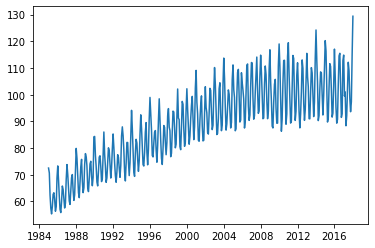

In [6]:
plt.plot(df)

In [7]:
df.shape

(397, 1)

In [8]:
size=int(df.shape[0]*0.8)
size

317

In [9]:
xtrain=df.iloc[:size]
xtrain.shape

(317, 1)

In [10]:
xtest=df.iloc[size:]
xtest.shape

(80, 1)

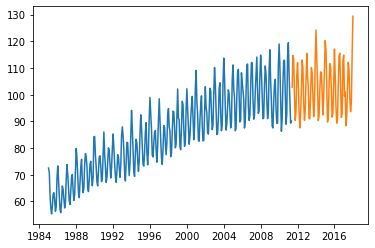

In [11]:
plt.plot(xtrain)
plt.plot(xtest)

#### Scaling the data

In [12]:
sc=MinMaxScaler()
sc.fit(xtrain)
sc_xtrain=sc.transform(xtrain)
sc_xtest=sc.transform(xtest)

In [13]:
def feature_selection(n_steps,data):
    x = []
    y = []
    for i in range(n_steps,len(data)):
        x.append(data[i-n_steps:i,0])
        y.append(data[i,0])
    return np.array(x),np.array(y)

In [14]:
n_steps = 20
xtrain,ytrain = feature_selection(n_steps,sc_xtrain)

In [15]:
xtrain.shape,ytrain.shape

((297, 20), (297,))

In [16]:
xtrain = xtrain.reshape((xtrain.shape[0],xtrain.shape[1],1))#row,column,feature

#### LSTM Model Generation

In [17]:
lstm_model=Sequential()
lstm_model.add(LSTM(100,activation='relu', input_shape = (20,1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = "adam",loss = "mean_squared_error",metrics = "accuracy")
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = lstm_model.fit(xtrain,ytrain,epochs = 50,batch_size = 200)

Epoch 1/50
2/2 [==============================] - 2s 34ms/step - loss: 0.2548 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 28ms/step - loss: 0.2086 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 24ms/step - loss: 0.1583 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 24ms/step - loss: 0.1210 - accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0858 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 26ms/step - loss: 0.0514 - accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0238 - accuracy: 0.0039
Epoch 8/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0155 - accuracy: 0.0039
Epoch 9/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0344 - accuracy: 0.0039
Epoch 10/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0351 - accuracy: 0.0022
Epoch

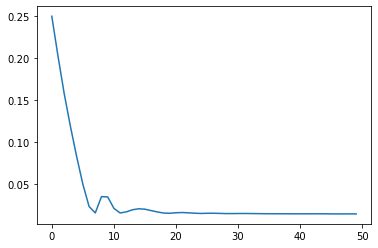

In [19]:
plt.plot(history.history["loss"])

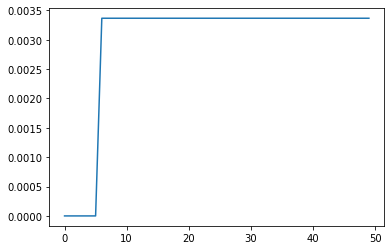

In [20]:
plt.plot(history.history["accuracy"])

In [21]:
xtest,ytest = feature_selection(n_steps,sc_xtest)
xtest = xtest.reshape((xtest.shape[0],xtest.shape[1],1))

In [22]:
ypred = lstm_model.predict(xtest)
prediction = sc.inverse_transform(ypred)
prediction

array([[102.34601 ],
       [102.80568 ],
       [102.74428 ],
       [101.4196  ],
       [100.41787 ],
       [100.640495],
       [101.7891  ],
       [102.41236 ],
       [102.003975],
       [100.98682 ],
       [100.78789 ],
       [102.40998 ],
       [104.9782  ],
       [105.90778 ],
       [105.808624],
       [104.20024 ],
       [103.123764],
       [103.239685],
       [103.96555 ],
       [104.42564 ],
       [103.86716 ],
       [102.644745],
       [102.43097 ],
       [103.39564 ],
       [105.46474 ],
       [106.78037 ],
       [106.59425 ],
       [104.86695 ],
       [103.56616 ],
       [103.70292 ],
       [104.66578 ],
       [105.18334 ],
       [104.588486],
       [103.12738 ],
       [102.116486],
       [102.45737 ],
       [104.22346 ],
       [104.50202 ],
       [103.4809  ],
       [101.960335],
       [100.813354],
       [101.295746],
       [102.72922 ],
       [104.02069 ],
       [103.68896 ],
       [102.29671 ],
       [101.37822 ],
       [102.8

In [23]:
ytest = sc.inverse_transform(ytest.reshape(-1,1))
ytest

array([[106.734 ],
       [102.9948],
       [ 91.0092],
       [ 90.9634],
       [100.6957],
       [110.148 ],
       [108.1756],
       [ 99.2809],
       [ 91.7871],
       [ 97.2853],
       [113.4732],
       [124.2549],
       [112.8811],
       [104.7631],
       [ 90.2867],
       [ 92.134 ],
       [101.878 ],
       [108.5497],
       [108.194 ],
       [100.4172],
       [ 92.3837],
       [ 99.7033],
       [109.3477],
       [120.2696],
       [116.3788],
       [104.4706],
       [ 89.7461],
       [ 91.093 ],
       [102.6495],
       [111.6354],
       [110.5925],
       [101.9204],
       [ 91.5959],
       [ 93.0628],
       [103.2203],
       [117.0837],
       [106.6688],
       [ 95.3548],
       [ 89.3254],
       [ 90.7369],
       [104.0375],
       [114.5397],
       [115.5159],
       [102.7637],
       [ 91.4867],
       [ 92.89  ],
       [112.7694],
       [114.8505],
       [ 99.4901],
       [101.0396],
       [ 88.353 ],
       [ 92.0805],
       [102.

In [24]:
print('mse',mean_squared_error(ytest,prediction))
print('RMSE',np.sqrt(mean_squared_error(ytest,prediction)))
print('r2_score',r2_score(ytest,prediction))

mse 102.29519956296863
RMSE 10.114108935688236
r2_score -0.0765018968520017


### GRU MODEL

In [25]:
from keras.models import Sequential
from keras.layers import GRU,Dense
gru_model = Sequential()
gru_model.add(GRU(100,activation = 'relu',input_shape = (n_steps,1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer = 'adam',loss = 'mean_squared_error')
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               30900     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = gru_model.fit(xtrain,ytrain,epochs=50,batch_size=100)

Epoch 1/50
3/3 [==============================] - 2s 30ms/step - loss: 0.2864
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 0.2552
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.2193
Epoch 4/50
3/3 [==============================] - 0s 24ms/step - loss: 0.1880
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.1470
Epoch 6/50
3/3 [==============================] - 0s 20ms/step - loss: 0.1112
Epoch 7/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0876
Epoch 8/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0576
Epoch 9/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0300
Epoch 10/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0276
Epoch 11/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0347
Epoch 12/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0297
Epoch 13/50
3/3 [==============================] - 0s 20ms/st

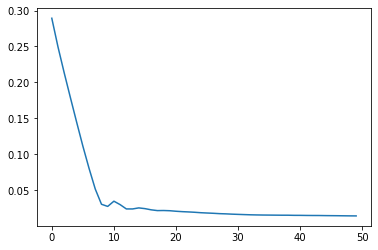

In [27]:
plt.plot(history.history["loss"])

In [28]:
ypred = gru_model.predict(xtest)
predicted = sc.inverse_transform(ypred)
predicted

array([[103.390465],
       [102.91293 ],
       [102.22301 ],
       [ 99.5454  ],
       [ 98.45946 ],
       [ 99.8654  ],
       [102.24364 ],
       [102.75771 ],
       [101.269905],
       [ 99.258095],
       [ 99.58044 ],
       [102.9998  ],
       [106.17592 ],
       [105.891174],
       [104.50069 ],
       [101.113716],
       [100.159546],
       [101.55278 ],
       [103.2674  ],
       [103.806725],
       [102.432655],
       [100.28343 ],
       [100.8943  ],
       [103.03527 ],
       [105.927284],
       [106.68574 ],
       [104.86393 ],
       [101.28179 ],
       [100.10607 ],
       [101.76303 ],
       [104.042694],
       [104.63539 ],
       [103.14032 ],
       [100.50119 ],
       [ 99.67467 ],
       [101.27427 ],
       [104.555016],
       [103.81193 ],
       [101.366684],
       [ 99.147156],
       [ 98.31202 ],
       [100.48134 ],
       [103.31502 ],
       [104.708115],
       [102.89792 ],
       [100.077095],
       [ 99.25361 ],
       [102.9

In [29]:
print('mse',mean_squared_error(ytest,ypred))
print('RMSE',np.sqrt(mean_squared_error(ytest,ypred)))
print('r2_score',r2_score(ytest,ypred))

mse 10554.196265988669
RMSE 102.73361799327749
r2_score -110.06691563851327
